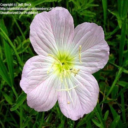

In [1]:
import torchvision
import torch
from PIL import Image

size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102("./flowers", "test", transform=transform, download=True))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())
visualize_image(train_dataset[1][0])

In [5]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
train_images = torch.stack([im for im, _ in train_dataset], dim=0).to(device)
train_label = torch.tensor([label for _, label in train_dataset]).to(device)

In [10]:
model = torch.nn.Linear(128 * 128 * 3, 102).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0)
for epoch in range(1000):
    # Compute model output
    out = model(train_images.view(-1, 128 * 128 * 3))

    # Compute loss
    loss_value = loss(out, train_label)

    # Compute gradients and update weights
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"{epoch=} {loss_value.item()=}")

epoch=0 loss_value.item()=4.648751258850098
epoch=10 loss_value.item()=4.131979465484619
epoch=20 loss_value.item()=3.747837781906128
epoch=30 loss_value.item()=3.4319050312042236
epoch=40 loss_value.item()=3.1627628803253174
epoch=50 loss_value.item()=2.9280588626861572
epoch=60 loss_value.item()=2.720292329788208
epoch=70 loss_value.item()=2.534520149230957
epoch=80 loss_value.item()=2.367213726043701
epoch=90 loss_value.item()=2.215700626373291
epoch=100 loss_value.item()=2.077871084213257
epoch=110 loss_value.item()=1.9520151615142822
epoch=120 loss_value.item()=1.8367208242416382
epoch=130 loss_value.item()=1.7308036088943481
epoch=140 loss_value.item()=1.6332602500915527
epoch=150 loss_value.item()=1.5432308912277222
epoch=160 loss_value.item()=1.4599734544754028
epoch=170 loss_value.item()=1.3828421831130981
epoch=180 loss_value.item()=1.3112704753875732
epoch=190 loss_value.item()=1.244759202003479
epoch=200 loss_value.item()=1.182866096496582
epoch=210 loss_value.item()=1.1251

In [11]:
test_images = torch.stack([im for im, _ in test_dataset], dim=0).to(device)
test_label = torch.tensor([label for _, label in test_dataset]).to(device)

pred_test = model(test_images.view(-1, 128 * 128 * 3))
print((pred_test.argmax(dim=1) == test_label).float().mean().item())

0.15319563448429108
